In [45]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

combined = pd.read_csv("Fires_by_cause.csv")


def percent_calc(x):
    array = x['Location'].unique().tolist()
    # array = ['PC',"BC","AB","SK","MB",'ON','QC','NB','NS','PE','NL','NT','YT']
    
    sum_provinces = []
    for province in array:
        i=x[x['Location']==province]['Number'].sum()
        sum_provinces.append(i)
    print(array)
    print(sum_provinces)
    
    percentage_list=[]
    
    for i in range(len(array)):
        
        df2=x[x['Location']==array[i]]['Number']
        
        df2=df2.tolist() # this was originally a pandas series..had to use .type to convert to figure out the kind and then convert it to list

        for j in range(len(df2)):
            
           # print(df2[j])
            # print(sum_provinces[i])
            
            percentage = (df2[j]/sum_provinces[i])*100 
            
            percentage_list.append(percentage)  
            
    return percentage_list
    


combined['Percentage']=percent_calc(combined)

combined.to_csv("combined.csv",index=None)
  
combined = combined[combined["Location"]!="PE"]

combined.shape


['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'ON', 'PC', 'PE', 'QC', 'SK', 'YT']
[36984, 56588, 10957, 8754, 3004, 7405, 7194, 34381, 2588, 11, 21222, 16961, 3631]


(722, 6)

In [44]:
combined.head()

,Year,Location,Cause,Area (hectares),Number,Percentage
0,1990,AB,Human activity,2385.4,372,1.005840
1,1990,AB,Lightning,30890.7,914,2.471339
2,1991,AB,Human activity,2260.5,431,1.165369
3,1991,AB,Lightning,3769.3,466,1.260004
4,1992,AB,Human activity,2002.2,398,1.076141


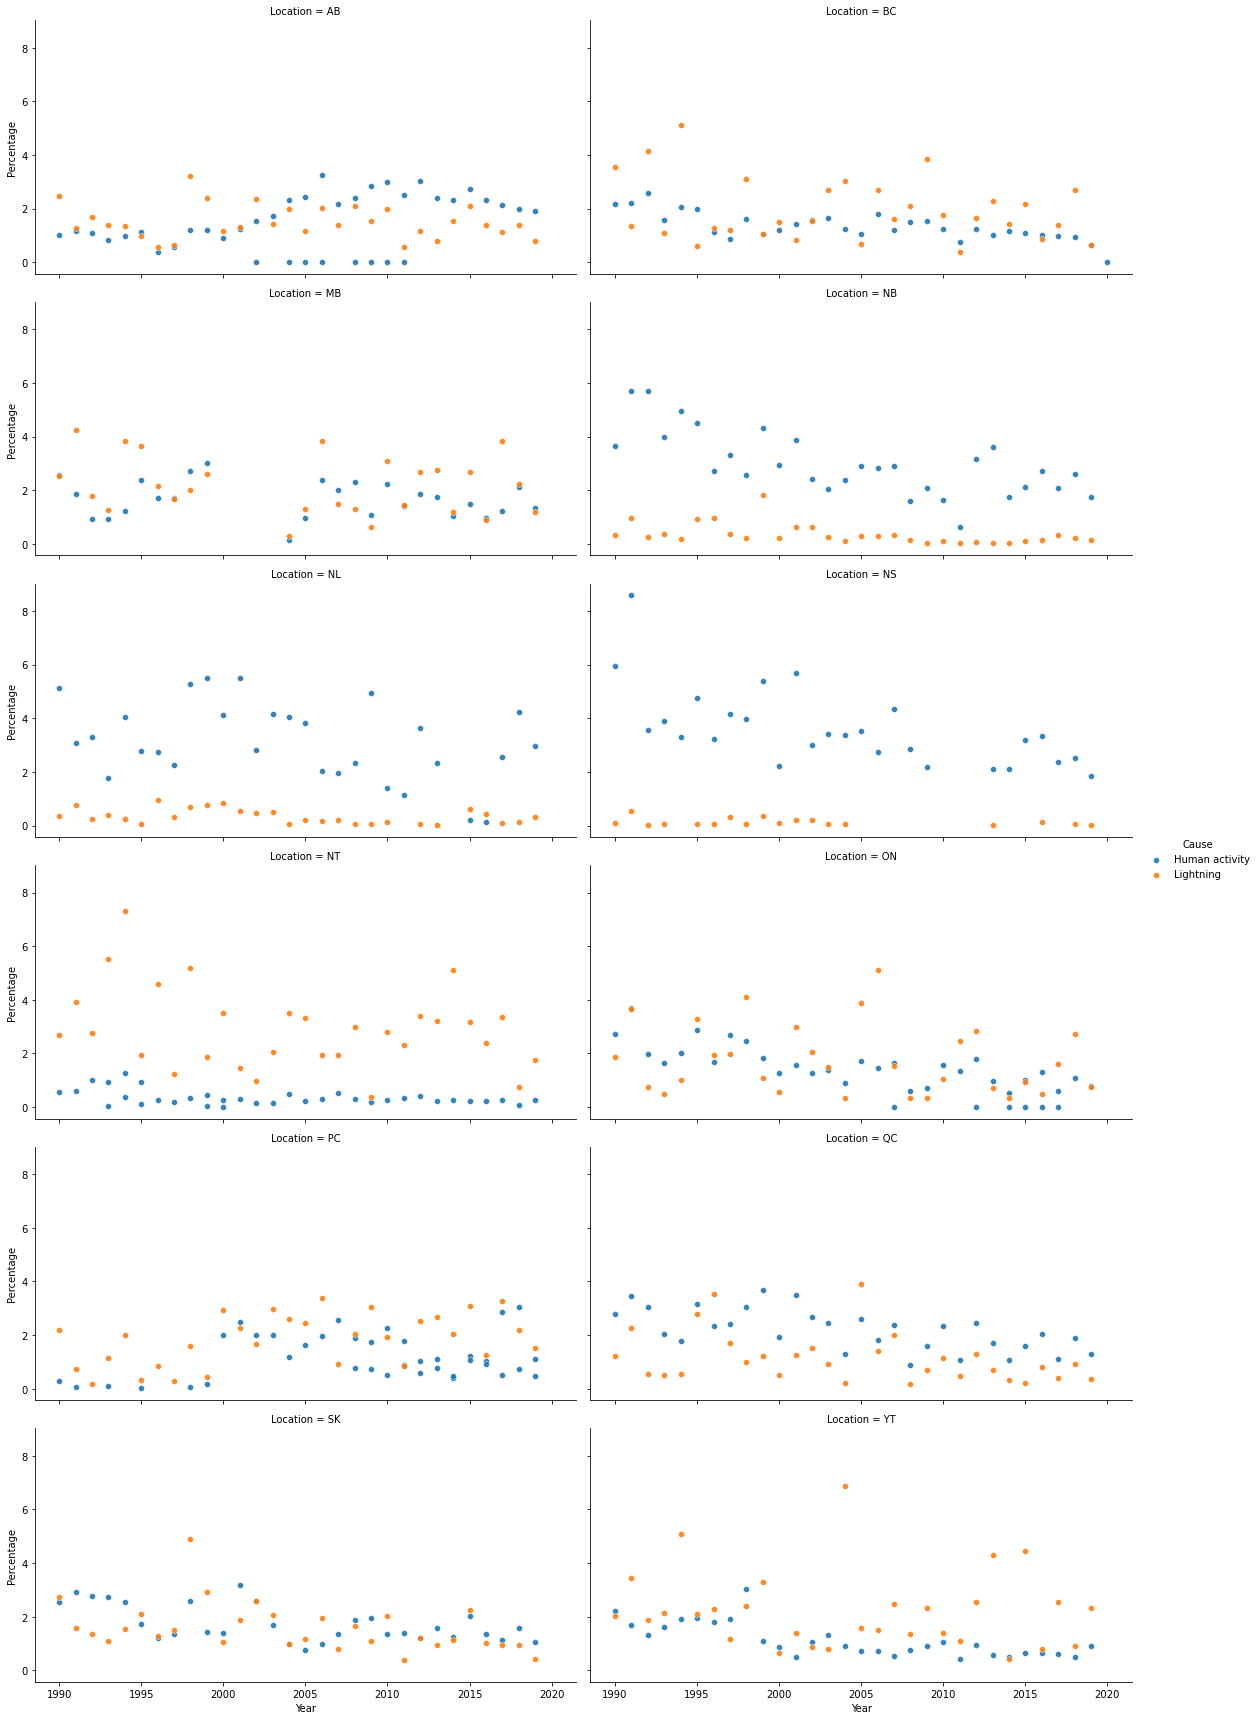

In [46]:
g = sns.FacetGrid(combined, col="Location",hue="Cause",height=4,aspect=2,col_wrap=2,margin_titles=True)
g.map(sns.scatterplot, "Year", "Percentage", alpha=0.9)
#g.map(sns.violinplot, "Year", "Percentage",split=True)
g.add_legend()
g.set_axis_labels( x_var=None, y_var=None, clear_inner=False)